# 線形回帰

線形な回帰モデル。最も単純な機械学習モデルと言える。

### 回帰

機械学習における回帰とは、入力から単一の連続的な実数値を予測すること。予測値は量的変数。

入力と、それをモデルに入力したときに得られるべき出力をペアとし、学習データとする。この学習データから入力と出力の関係を学び、未知の入力に対して妥当な出力が得られるようにする。このような学習を**教師あり学習**という。教師あり学習において、入力を**説明変数**、出力を**目的変数**と呼ぶ。説明変数は一つ以上の値で、一般的にベクトルと呼べる。目的変数は一つの値。

さて、「最も簡単な関数」と言われて何を思い浮かべるだろうか。一次関数を思い浮かべる人は多いのではないだろうか。おそらく中学校で初めに習うだろう。

$$
f(x) = ax + b
$$

線形回帰ではこの一次関数がモデルとなる。一次関数はグラフで表すと直線となる。数学では「線形」は直線を意味する。線形回帰という名前はここから納得できる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt


---

## 最小二乗法

線形回帰における、予測値$\hat y$と正解$y$の二乗和誤差（差の二乗の和）が最小になるようなパラメータを求める手法。

$$
\begin{align}
E
    &= \sum_{n=1}^{N} (y^{(n)} - \hat y^{(n)})^2 \\
    &= \sum_{n=1}^{N} (y^{(n)} - f(x^{(n)}))^2 \\
    &= \sum_{n=1}^{N} (y^{(n)} - (ax^{(n)} + b))^2
\end{align}
$$

最小二乗法という言葉の定義について、適当にググった感じ、線形回帰で上記を行う場合に限定している記述と、そうでない記述を両方見かける。「最小二乗法」という文字だけ見れば特に線形回帰に限定する必要もなさそうだけど、線形回帰以外で（モデルに依らず二乗和誤差を最小にするという文脈で）この言葉が使われている場面をあまり見ないので、ここでは線形回帰に限定する。

線形回帰の学習では基本的に最小二乗法が使われる。最小二乗法を使うことでパラメータを<u>\*解析的</u>に解くことができる。二乗和誤差を使うことで、最小化したい関数がパラメータに関する二次関数になるので、微分によって最適解を求めることができる。差の絶対値ではなく二乗を使う意味がここにある。

- 解析的に解く: 数式の変形によって解を一意に求めること。
- 数値的に解く: 数値計算によって解を近似的に求めること。モンテカルロ法といった乱数を用いたシミュレーション手法などが当てはまる。解析的に解くことができない問題に使われる。

### 最尤推定との関係

最小二乗法は誤差に正規分布を仮定した最尤推定と見ることができる。差の二乗を取る意味はここからも納得できる。

$x$に対するモデルの予測値$f(x)$と正解$y$の差が正規分布に従うと仮定して、確率モデル$p(x)$を以下のように定義する。

$$
\begin{align}
p(x)
    &= \mathcal N(x; f(x), \sigma^2) \\
    &= \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y - f(x))^2}{2\sigma^2} \right) \\
    &= \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y - ax - b)^2}{2\sigma^2} \right)
\end{align}
$$

データ$\mathcal X=\{x^{(1)}, x^{(2)},\dots,x^{(N)}\}$と、それに対応する正解$\mathcal Y=\{y^{(1)},y^{(2)},\dots,y^{(N)}\}$が得られた下での対数尤度$\log p(\mathcal X)$を最大化するパラメータ$a,b$を考える。

対数尤度は

$$
\begin{align}
\log p(\mathcal X)
    &= \log \prod_{n=1}^{N} p(x^{(n)})\\
    &= \sum_{n=1}^{N} \log p(x^{(n)}) \\
    &= \sum_{n=1}^{N} \log \left(\frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y^{(n)} - ax^{(n)} - b)^2}{2\sigma^2} \right)\right) \\
    &= \sum_{n=1}^{N} \left( \log \frac{1}{\sqrt{2\pi\sigma^2}} -\frac{(y^{(n)} - ax^{(n)} - b)^2}{2\sigma^2} \right) \\
    &= -\frac{n}{2} \log 2\pi\sigma^2 - \frac{1}{2\sigma^2} \sum_{n=1}^{N} (y^{(n)} - ax^{(n)} - b)^2 \\
    &= -\frac{1}{2\sigma^2} \sum_{n=1}^{N} (y^{(n)} - ax^{(n)} - b)^2 + \text{const}
\end{align}
$$

となる。この最大化は、$\sum_{n=1}^{N} (y^{(n)} - ax^{(n)} - b)^2$の最小化つまり最小二乗法で線形回帰を解くことと同じになる。


---

## 単回帰

説明変数が一つの回帰を単回帰という。まずは単回帰で線形回帰を学んでいこう。

改めてモデルを見てみる。

$$
f(x) = ax + b
$$

$x$が説明変数。単回帰なので、なんらかの実数値。$a,b$はパラメータ。回帰分析において$a$は**回帰係数**と呼ばれる。

$N$個のサンプル$\mathcal D = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(N)}, y^{(N)})\}$が得られたとする。これらが学習データ。

モデルに$x^{(n)}$を入力したときに得られる出力値が$y^{(n)}$に近くなるように、パラメータ$a,b$を調整する。この問題は最小二乗法によって解くことができる。

では解いていこう...の前に、この問題を視覚的に表してみよう。

説明変数が一つなので、説明変数と目的変数の関係を散布図で表せる。適当にサンプルデータを用意して散布図を描いてみる。

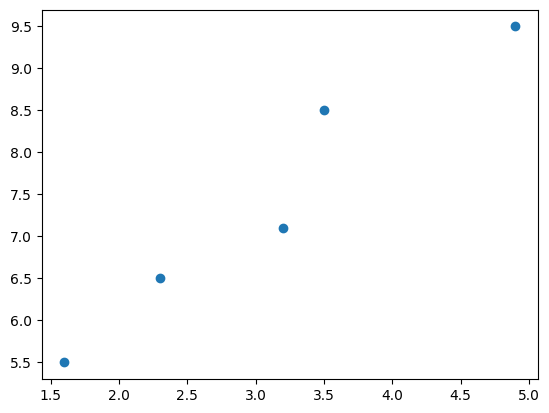

In [2]:
x = np.array([2.3, 4.9, 1.6, 3.5, 3.2])
y = np.array([6.5, 9.5, 5.5, 8.5, 7.1])
plt.scatter(x, y);

このデータを線形回帰モデルに学習させることは、散布図上の点の近くを通るような直線を求めることに相当する。

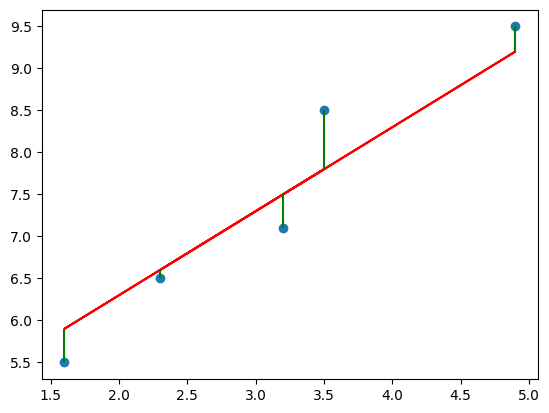

In [3]:
f = lambda x: x + 4.3
plt.scatter(x, y)
plt.plot(x, f(x), color='red')
for xi, yi in zip(x, y):
    plt.vlines(xi, yi, f(xi), color='green');

適当なパラメータを設定して直線を引いた。  
この緑の線の長さ（の二乗）の合計がモデルの予測値と正解の差を表す。この差が最小になるような直線を求めるのが線形回帰の学習である。

問題を理解したので、実際に解いてみよう。以下の誤差$E$を最小にするような$a,b$を求める。

$$
\begin{align}
E
    &= \sum_{n=1}^{N} (y^{(n)} - f(x^{(n)}))^2 \\
    &= \sum_{n=1}^{N} (y^{(n)} - ax^{(n)} - b)^2
\end{align}
$$

このような最大化・最小化の対象となる関数を**目的関数**という。このままでも良いが、目的関数はパラメータを変数として扱うので、それを明示して書く。

$$
J(a, b) = \sum_{n=1}^{N} (y^{(n)} - ax^{(n)} - b)^2
$$

パラメータは$\theta$とまとめることもある。

$$
J(\theta) = \sum_{n=1}^{N} (y^{(n)} - ax^{(n)} - b)^2
$$

これを展開すると、パラメータ$a,b$に関する下に凸の二次関数になる。よって、各パラメータで$J$を偏微分して、傾きが0になる点を求めればよい。

ではやっていこう。まずは$b$から。

$$
\begin{align}
\frac{\partial J}{\partial b}
    &= \sum_{n=1}^{N} \frac{\partial}{\partial b}(y^{(n)} - ax^{(n)} - b)^2 \\
    &= \sum_{n=1}^{N} 2(y^{(n)} - ax^{(n)} - b)(-1) \\
    &= -2 \sum_{n=1}^{N} (y^{(n)} - ax^{(n)} - b) \\
\end{align}
$$

これが0になる$b$を求める。

$$
\begin{align}
-2 \sum_{n=1}^{N} (y^{(n)} - ax^{(n)} - b) &= 0 \\
\sum_{n=1}^{N} y^{(n)} - a\sum_{n=1}^{N} x^{(n)} - Nb &= 0 \\
\sum_{n=1}^{N} y^{(n)} - a\sum_{n=1}^{N} x^{(n)} &= Nb \\
\frac{\sum_{n=1}^{N} y^{(n)}}{N} - a\frac{\sum_{n=1}^{N} x^{(n)}}{N} &= b \\
\bar y - a\bar x &= b
\end{align}
$$

$b = - a\bar x + \bar y $が求まった。$\bar x$は$x$の平均値。

次は$a$を求める。

$$
\begin{align}
\frac{\partial J}{\partial a}
    &= \sum_{n=1}^{N} \frac{\partial}{\partial a} (y^{(n)} - ax^{(n)} - b)^2 \\
    &= \sum_{n=1}^{N} 2(y^{(n)} - ax^{(n)} - b)(-x^{(n)}) \\
    &= -2 \sum_{n=1}^{N} x^{(n)} (y^{(n)} - ax^{(n)} - b) \\
\end{align}
$$

これが0になる$a$を求める。

$$
\begin{align}
    -2 \sum_{n=1}^{N} x^{(n)} (y^{(n)} - ax^{(n)} - b) &= 0 \\
    \sum_{n=1}^{N} x^{(n)} y^{(n)} - a\sum_{n=1}^{N} (x^{(n)})^2 - b\sum_{n=1}^{N} x^{(n)} &= 0 \\
\end{align}
$$

両辺を$N$で割る。

$$
\bar{xy} - a\bar{x^2} - b\bar{x} = 0
$$

$b = - a\bar x + \bar y $を代入する。

$$
\begin{align}
\bar{xy} - a\bar{x^2} - (- a\bar x + \bar y)\bar{x} &= 0 \\
\bar{xy} - a\bar{x^2} + a\bar{x}^2 - \bar y\bar{x} &= 0 \\
\bar{xy} - \bar{x}\bar{y} &= a(\bar{x}^2 - \bar{x^2}) \\
\sigma_{xy} &= a\sigma_x^2 \\
\frac{\sigma_{xy}}{\sigma_x^2} &= a
\end{align}
$$

$a = \frac{\sigma_{xy}}{\sigma_x^2}$が求まった。$\sigma_{xy}$は$x,y$の共分散。$\sigma_x^2$は$x$の分散。

以上より

$$
\begin{align}
a &= \frac{\sigma_{xy}}{\sigma_x^2} \\
b &= - a\bar x + \bar y
\end{align}
$$

が求まった。

ではこれを実装してみよう。

In [4]:
class SimpleLinearRegression:
    def __init__(self):
        self.a = None
        self.b = None

    def fit(self, x, y):
        x_var, cov = np.cov(x, y)[0]
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        self.a = cov / x_var
        self.b = -self.a * x_mean + y_mean

    def predict(self, x):
        return self.a * x + self.b

メソッド名はsklearnに倣った。`fit`で学習し、`predict`で予測を行う。

できた。このモデルを学習させてみよう。

In [5]:
model = SimpleLinearRegression()
model.fit(x, y)
print("傾き:", model.a)
print("切片:", model.b)

傾き: 1.2317460317460318
切片: 3.6015873015873012


sklearnの実装とも一致している。

In [6]:
from sklearn.linear_model import LinearRegression
correct_model = LinearRegression()
correct_model.fit(x.reshape(-1, 1), y)
print("傾き:", correct_model.coef_[0])
print("切片:", correct_model.intercept_)

傾き: 1.2317460317460316
切片: 3.601587301587302


直線を引いてみよう。

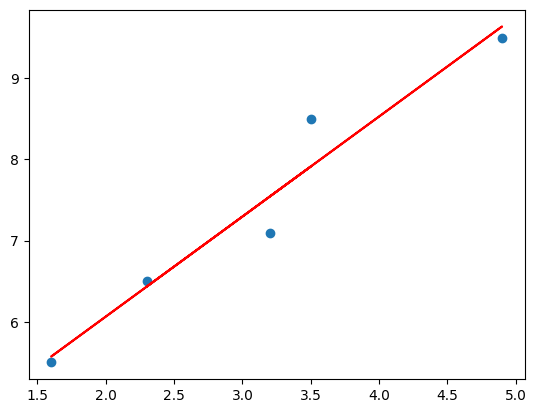

In [7]:
y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red');

いい感じの直線を引くことができた。この直線は回帰直線と呼ぶ。


---

## 重回帰

次は重回帰を行う。説明変数が複数となる。

モデルは以下。

$$
f(x_1, x_2, \dots, x_m) = a_1x_1 + a_2x_2 + \dots + a_mx_m + b
$$

$m$は説明変数の数。

説明変数とパラメータが$m$個に増えた。各説明変数に対応する回帰係数が設定されており、これらは**偏回帰係数**と呼ばれる。

ここで、モデルの表記を書き換える。ベクトルを用いて以下のように表す。

$$
f(\bm x) = \bm w^T\bm x + b
$$

$\bm w^T\bm x$は内積。

入力は$\bm x = (x_1, x_2, \dots, x_m)^T \in \mathbb R^m$とした。  
パラメータは$\bm w = (w_1, w_2, \dots, w_m)^T \in \mathbb R^m$した。このパラメータは重み（*weight*）と呼ばれるので、$\bm a$ではなく$\bm w$とした。$b$はバイアス（*bias*）と呼ぶのでそのまま$b$。

ここで、さらにモデルの表記を書き換える。バイアスを$\bm w$に含める。そして、$\bm x$の対応する位置に1を追加する。ここでは$w_0$をバイアスとし、$\bm x$の先頭に1を追加するようにしよう。

$$
\begin{align}
\bm w &= (w_0, w_1, w_2, \dots, w_m)^T \in \mathbb R^{m+1} \\
\bm x &= (1, x_1, x_2, \dots, x_m)^T \in \mathbb R^{m+1}
\end{align}
$$

こうすることで、モデルを以下のように表せる。

$$
f(\bm x) = \bm w^T\bm x
$$

バイアス項を消すことができた。

さて、目的関数を定義しよう。

$$
\begin{align}
J(\bm w)
    &= \sum_{n=1}^{N} (y^{(n)} - f(\bm x^{(n)}))^2 \\
    &= \sum_{n=1}^{N} (y^{(n)} - \bm w^T\bm x^{(n)})^2
\end{align}
$$

これでもいいが、行列を用いるとより簡潔に書ける。

$$
J(\bm w) = \| \bm y - X\bm w\|_2^2 \\
$$

- $X=(\bm x^{(1)}, \bm x^{(2)}, \dots, \bm x^{(N)})^T \in \mathbb R^{N\times(m+1)}$は各入力データ$\bm x^{(n)}$を並べた行列。
- $\bm x^{(n)} = (1, x_1^{(n)}, x_2^{(n)}, \dots, x_m^{(n)})^T \in \mathbb R^{m+1}$は特徴量を並べたベクトル。
- $\bm y = (y^{(1)}, y^{(2)}, \dots, y^{(N)})^T \in \mathbb R^N$は各目的変数を並べたベクトル。
- 二乗和誤差はデータごとの差を並べたベクトルL2ノルムの二乗として表している。

では、これが最小になるような$\bm w$を求めよう。求め方は単回帰と同じで、目的関数$J$を$\bm w$で偏微分して0になる点を求める。

まず$J$を変形する。

$$
\begin{align}
J(\bm w)
    &= \| \bm y - X\bm w\|_2^2 \\
    &= (\bm y-X\bm w)^T(\bm y-X\bm w) \\
	&= (\bm y^T-\bm w^TX^T)(\bm y-X\bm w) \\
	&= \bm y^T\bm y - \bm y^TX\bm w - \bm w^TX^T\bm y + \bm w^TX^TX\bm w \\
	&= \bm y^T\bm y - 2\bm y^TX\bm w + \bm w^TX^TX\bm w
\end{align}
$$

最後の変形は、$\bm y^TX\bm w$がスカラーでなので

$$
\bm y^TX\bm w = (\bm y^TX\bm w)^T = \bm w^TX^T\bm y
$$

が成り立ち

$$
-\bm y^TX\bm w - \bm w^TX^T\bm y = -2\bm y^TX\bm w
$$

となることを利用している。

では次に勾配を求める。

$$
\begin{align}
\frac{\partial J}{\partial \bm w}
	&= (-2\bm y^TX)^T + (X^TX\bm w + (\bm w^TX^TX)^T) \\
	&= -2X^T\bm y + 2X^TX\bm w
\end{align}
$$

んでこれが0になる$\bm w$を求める。

$$
\begin{align}
-2X^T\bm y + 2X^TX\bm w  &= 0 \\
X^TX\bm w &= X^T\bm y \\
\bm w &= (X^TX)^{-1}X^T\bm y
\end{align}
$$

これが解。この式は**正規方程式**と呼んだりする。

ではこれを実装してみよう。

In [8]:
class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1) # 1列目に1を挿入
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return X @ self.weights

適当なデータを学習させてみる。

In [9]:
# サンプルデータの読み込み
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

In [10]:
model = LinearRegression()
model.fit(X, y)
print("偏回帰係数:", model.weights[1:])
print("切片:", model.weights[0])

偏回帰係数: [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
切片: 152.13348416289597


scikit-learnに実装されているものと結果が一致するかを確認する。

In [11]:
from sklearn.linear_model import LinearRegression as CorrectLinearRegression
correct_model = CorrectLinearRegression()
correct_model.fit(X, y)
print("偏回帰係数:", correct_model.coef_)
print("切片:", correct_model.intercept_)

偏回帰係数: [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
切片: 152.13348416289597


同じになったね。

ちなみに、特徴量のスケールを揃えないといけないので正規化が必要。ただ`scaled=True`がデフォルトで設定されているので、今回はこちらで処理を行わなくて良い。

また正規化されているのは説明変数（`X`）だけで、目的変数（`y`）は正規化されていない。線形回帰においては目的変数の正規化は不要。

### 解釈性



学習後のパラメータの絶対値の大きさは、各特徴量が予測結果に与える影響の強さと解釈できる。回帰係数とは回帰直線の傾きなので、対応する特徴量の変化に対して予測値がどれだけ変化するかを表している。

予測時にモデルがどの特徴量を重視しているか、と解釈することもできる。このようなシンプルな解釈が可能であることは線形回帰の大きな強みである。モデルの予測精度が高くても、その理由を説明できないモデルは実務で扱いづらい（らしい）。そういったモデルの中身はブラックボックスと表現される。

ブラックボックスなモデルを解釈しようとするXAI（Explainable AI）と呼ばれる分野も存在する。XAIでは、ブラックボックスなモデルを線形回帰のような解釈可能なモデルで近似するといった手法が研究されている。


---

## 多項式回帰

非線形な関係を多項式で表現する線形回帰モデル。

単回帰ではこれまで、説明変数と目的変数の関係を以下のような線形な関数（1次関数）でモデル化してきた。

$$
f(x) = wx + b
$$

しかし、説明変数と目的変数の関係が非線形な場合もある。そのような場合、これまでのモデル化では不適切となる。そこで、次数を増やした多項式でモデル化することを考える。

$$
f(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + \dots + w_lx^l
$$

$b$を$w_0$とした。$l$は次数で、2以上の任意の整数。

このモデルのパラメータ$w_0, w_1, w_2, \dots, w_l$を学習する。重回帰と同じ手法で学習できる。説明変数$x$から、その累乗$x^2, x^3, \dots, x^l$を新たな説明変数として追加し、線形回帰を行うということ。

これを**多項式回帰**という。

また重回帰の多項式回帰も考え方は同じで、各説明変数$x_1, x_2, \dots, x_m$からその累乗を新たな説明変数として追加する。つまり$m$個であった特徴量・パラメータが共に$m\times l$個に増える。

多項式回帰は非線形な関係をモデル化するが、線形回帰に含まれる。線形回帰の**線形**とはパラメータに関する線形性を意味するので。

それでは実際にやってみよう。以下のようなサンプルが得られたとする。

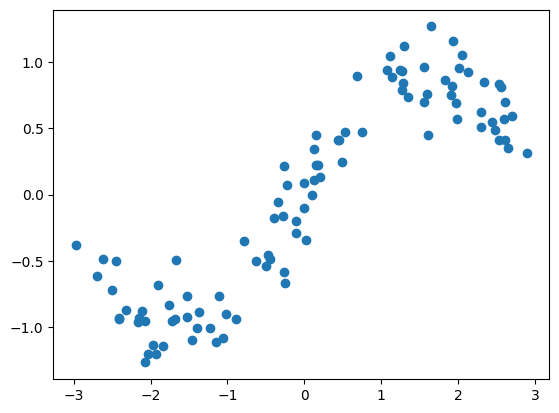

In [12]:
n = 100
x_range = (-3, 3)
x = np.random.uniform(*x_range, n)
y = np.sin(x) + 0.2 * np.random.randn(n)
plt.scatter(x, y);

この図を見ると、3次式が適している気がするので、以下のようにモデル化しよう。

$$
f(x) = w_0 + w_1x + w_2x^2 + w_3x^3
$$

やってみよう。まず特徴量を増やす。

In [13]:
x_2 = x ** 2
x_3 = x ** 3
X = np.stack([x, x_2, x_3], axis=1)
X.shape

(100, 3)

sklearnの`PolynomialFeatures`を使っても良い。

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(x.reshape(-1, 1))
X.shape

(100, 3)

これを学習させる。

In [15]:
model = LinearRegression()
model.fit(X, y)
print("偏回帰係数:", model.weights[1:])
print("切片:", model.weights[0])

偏回帰係数: [ 0.82501645 -0.01090081 -0.08759696]
切片: -0.0035227262495300116


この偏回帰係数が各項に対応する係数ということ。左から、$x, x^2, x^3$の係数。

このモデルで曲線を引いてみる。

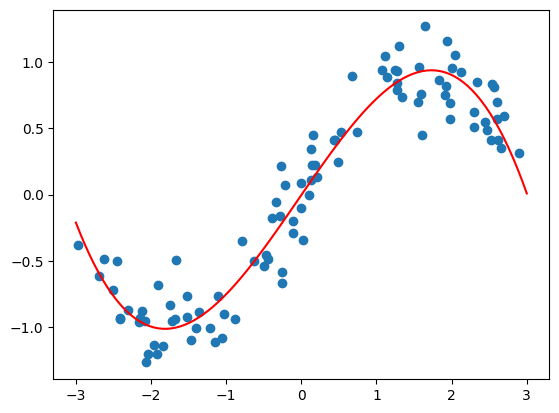

In [16]:
x_axis = np.linspace(*x_range, 100)
X_axis = poly.transform(x_axis.reshape(-1, 1))
y_pred = model.predict(X_axis)
plt.scatter(x, y)
plt.plot(x_axis, y_pred, color="red");

いい感じにフィットした曲線を引くことができた。